### [Tweet] Import tweet data on topic Tesla

In [232]:
import pandas as pd
import numpy as np

tesla_tweets = pd.read_csv('../data/twitter/tweets_isTweet_emotions_tesla.csv')
tesla_tweets["createdAt"] = pd.to_datetime(
    tesla_tweets["createdAt"]
)

/var/folders/nf/2xng7w014d1f2mbbxqsxbwg40000gn/T/ipykernel_5369/3694722589.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tesla_tweets["createdAt"] = pd.to_datetime(


In [233]:

all_tweets = pd.read_csv('../data/twitter/tweets_isTweet_emotions.csv')
all_tweets["createdAt"] = pd.to_datetime(
    all_tweets["createdAt"]
)

/var/folders/nf/2xng7w014d1f2mbbxqsxbwg40000gn/T/ipykernel_5369/66657273.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_tweets["createdAt"] = pd.to_datetime(


In [234]:
import pytz
tesla_tweets = tesla_tweets[['tweet_id','combined_text', 'createdAt']]   
all_tweets = all_tweets[['tweet_id','tweet_text', 'createdAt']]
eastern = pytz.timezone("US/Eastern")
tesla_tweets['createdAt'] = tesla_tweets['createdAt'].dt.tz_convert(eastern)


In [235]:
len(tesla_tweets), len(all_tweets)

(576, 11462)

In [236]:
non_tesla = pd.concat([tesla_tweets, all_tweets]).drop_duplicates(
    subset = ['tweet_id'],
                                                                   keep=False)
non_tesla['createdAt'] = pd.to_datetime(non_tesla['createdAt'] , utc= True).dt.tz_convert(eastern)

In [237]:
non_tesla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10886 entries, 0 to 11461
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype                     
---  ------         --------------  -----                     
 0   tweet_id       10886 non-null  int64                     
 1   combined_text  0 non-null      object                    
 2   createdAt      10886 non-null  datetime64[ns, US/Eastern]
 3   tweet_text     10886 non-null  object                    
dtypes: datetime64[ns, US/Eastern](1), int64(1), object(2)
memory usage: 425.2+ KB


In [238]:
# filter out tweets outside the time range of 04:00 to 19:00 
tesla_tweets = tesla_tweets[
    tesla_tweets["createdAt"].dt.time >= pd.to_datetime("04:00").time()
]
tesla_tweets = tesla_tweets[
    tesla_tweets["createdAt"].dt.time <= pd.to_datetime("19:00").time()
]

In [239]:
non_tesla = non_tesla[
    non_tesla["createdAt"].dt.time >= pd.to_datetime("04:00").time()
]
non_tesla = non_tesla[
    non_tesla["createdAt"].dt.time <= pd.to_datetime("19:00").time()
]

In [240]:
num_events = len(tesla_tweets)
print(f"Number of Tesla tweet-based events (with overlap): {num_events}")
num_events = len(non_tesla)
print(f"Number of Non-Tesla tweet-based events (with overlap): {num_events}")

Number of Tesla tweet-based events (with overlap): 363
Number of Non-Tesla tweet-based events (with overlap): 6371


In [241]:
event_dates = tesla_tweets['createdAt'].tolist()
event_dates = sorted(event_dates)
event_dates

[Timestamp('2024-02-01 18:48:56-0500', tz='US/Eastern'),
 Timestamp('2024-02-03 12:40:37-0500', tz='US/Eastern'),
 Timestamp('2024-02-03 13:24:57-0500', tz='US/Eastern'),
 Timestamp('2024-02-05 07:22:50-0500', tz='US/Eastern'),
 Timestamp('2024-02-05 18:21:03-0500', tz='US/Eastern'),
 Timestamp('2024-02-06 12:42:03-0500', tz='US/Eastern'),
 Timestamp('2024-02-07 11:12:52-0500', tz='US/Eastern'),
 Timestamp('2024-02-11 13:42:01-0500', tz='US/Eastern'),
 Timestamp('2024-02-11 14:01:23-0500', tz='US/Eastern'),
 Timestamp('2024-02-12 12:39:39-0500', tz='US/Eastern'),
 Timestamp('2024-02-12 15:33:15-0500', tz='US/Eastern'),
 Timestamp('2024-02-14 13:54:33-0500', tz='US/Eastern'),
 Timestamp('2024-02-15 14:11:01-0500', tz='US/Eastern'),
 Timestamp('2024-02-18 14:43:16-0500', tz='US/Eastern'),
 Timestamp('2024-02-20 17:11:09-0500', tz='US/Eastern'),
 Timestamp('2024-02-22 18:06:53-0500', tz='US/Eastern'),
 Timestamp('2024-02-25 16:34:50-0500', tz='US/Eastern'),
 Timestamp('2024-02-26 10:26:50

In [242]:
event_dates_non_tesla = non_tesla['createdAt'].tolist()
event_dates_non_tesla = sorted(event_dates_non_tesla)

### [Stock] Import tesla-intraday stock data on US Market 

In [243]:
df_tesla_stock_us = pd.read_csv('../data/stocks/tesla_nyse_intraday_202305_202504-1m.csv')
df_tesla_stock_us.rename(columns={"Unnamed: 0": "Datetime"}, inplace=True)

# Convert to US/Eastern timezone
eastern = pytz.timezone("US/Eastern")
df_tesla_stock_us["Datetime"] = pd.to_datetime(df_tesla_stock_us["Datetime"], utc = True).dt.tz_convert(
    tz=eastern
)

# Sort by datetime
df_tesla_stock_us = df_tesla_stock_us.sort_values("Datetime").copy()
df_tesla_stock_us = df_tesla_stock_us.set_index("Datetime")
print(df_tesla_stock_us.index)

DatetimeIndex(['2023-05-01 04:00:00-04:00', '2023-05-01 04:01:00-04:00',
               '2023-05-01 04:02:00-04:00', '2023-05-01 04:03:00-04:00',
               '2023-05-01 04:04:00-04:00', '2023-05-01 04:05:00-04:00',
               '2023-05-01 04:06:00-04:00', '2023-05-01 04:07:00-04:00',
               '2023-05-01 04:08:00-04:00', '2023-05-01 04:09:00-04:00',
               ...
               '2025-04-30 22:50:00-04:00', '2025-04-30 22:51:00-04:00',
               '2025-04-30 22:52:00-04:00', '2025-04-30 22:53:00-04:00',
               '2025-04-30 22:54:00-04:00', '2025-04-30 22:55:00-04:00',
               '2025-04-30 22:56:00-04:00', '2025-04-30 22:57:00-04:00',
               '2025-04-30 22:58:00-04:00', '2025-04-30 22:59:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='Datetime', length=752820, freq=None)


### Event study 

The outcome dataframe shall contain the event time (when a tweet is published), the pre-event window (300 minutes before) and the post-event window (180 minutes after) and their corresponding **return metrics**

**Return metrics**
- Estimation window W
- Log return = log(pt/pt-1) where t the publishing time of a tweet
- Expected return = Mean(log return) across W
- Abnormal return = Log return - Expected return

In [244]:
# Parameters
estimation_obs = 300  # e.g., 5 hours of 1-minute intervals
post_event_obs = 180  # e.g., 3 hours of 1-minute intervals
min_gap_between_events = estimation_obs + post_event_obs  # minimum spacing in rows

# Compute log returns
df_tesla_stock_us = df_tesla_stock_us.sort_index()

valid_events = []
last_event_time = None

# Filter events with sufficient gap
for date in event_dates:
    if last_event_time is None:
        valid_events.append(date)
        last_event_time = date
    else:
        prev_idx = df_tesla_stock_us.index.get_indexer([last_event_time], method='nearest')[0]
        curr_idx = df_tesla_stock_us.index.get_indexer([date], method='nearest')[0]
        if (curr_idx - prev_idx) >= min_gap_between_events:
            valid_events.append(date)
            last_event_time = date

# Run event study
event_results = []

for event_time in valid_events:
    og_time = event_time
    try:
        # Align event_time to next available trading timestamp
        if event_time not in df_tesla_stock_us.index:
            future_times = df_tesla_stock_us.index[df_tesla_stock_us.index > event_time]
            if future_times.empty:
                continue
            event_time = future_times[0]

        event_idx = df_tesla_stock_us.index.get_loc(event_time)

        # Check if we have enough data
        if event_idx < estimation_obs or (event_idx + post_event_obs) >= len(df_tesla_stock_us):
            print(f"⏭️ Skipping {event_time} — not enough data")
            continue

        full_window = df_tesla_stock_us.iloc[event_idx - estimation_obs : event_idx + post_event_obs + 1].copy()
        full_window['tweet'] = tesla_tweets[tesla_tweets['createdAt'] == og_time]['combined_text'].values[0] if not tesla_tweets[tesla_tweets['createdAt'] == og_time].empty else "No tweet found"
        full_window["min_offset"] = range(-estimation_obs, post_event_obs + 1)
        full_window["event_time"] = event_time

        # Pre-event: expected_return = abnormal_return = 0
        full_window.loc[full_window["min_offset"] < 0, "expected_return"] = 0
        full_window.loc[full_window["min_offset"] < 0, "abnormal_return"] = 0

        # Post-event: compute expected and abnormal returns
        expected_return = full_window.loc[full_window["min_offset"] < 0, "log_return"].mean()
        full_window.loc[full_window["min_offset"] >= 0, "expected_return"] = expected_return
        full_window.loc[full_window["min_offset"] >= 0, "abnormal_return"] = (
            full_window["log_return"] - expected_return
        )
        
        event_results.append(full_window[[
            "event_time", "min_offset", "log_return", "expected_return", "abnormal_return", "tweet"
        ]].copy())

    except Exception as e:
        print(f"❌ Error at {event_time}: {e}")
        continue

# Combine all results
df_events = pd.concat(event_results).reset_index().drop(columns='Datetime')


In [245]:
valid_events_non_tesla = []
last_event_time = None

# Filter events with sufficient gap
for date in event_dates_non_tesla:
    if last_event_time is None:
        valid_events_non_tesla.append(date)
        last_event_time = date
    else:
        prev_idx = df_tesla_stock_us.index.get_indexer([last_event_time], method='nearest')[0]
        curr_idx = df_tesla_stock_us.index.get_indexer([date], method='nearest')[0]
        if (curr_idx - prev_idx) >= min_gap_between_events:
            valid_events_non_tesla.append(date)
            last_event_time = date

# Run event study
event_results_non_tesla = []

for event_time in valid_events_non_tesla:
    og_time = event_time
    try:
        # Align event_time to next available trading timestamp
        if event_time not in df_tesla_stock_us.index:
            future_times = df_tesla_stock_us.index[df_tesla_stock_us.index > event_time]
            if future_times.empty:
                continue
            event_time = future_times[0]

        event_idx = df_tesla_stock_us.index.get_loc(event_time)

        # Check if we have enough data
        if event_idx < estimation_obs or (event_idx + post_event_obs) >= len(df_tesla_stock_us):
            print(f"⏭️ Skipping {event_time} — not enough data")
            continue

        full_window = df_tesla_stock_us.iloc[event_idx - estimation_obs : event_idx + post_event_obs + 1].copy()
        full_window['tweet'] = non_tesla[non_tesla['createdAt'] == og_time]['tweet_text'].values[0] if not non_tesla[non_tesla['createdAt'] == og_time].empty else "No tweet found"
        full_window["min_offset"] = range(-estimation_obs, post_event_obs + 1)
        full_window["event_time"] = event_time

        # Pre-event: expected_return = abnormal_return = 0
        full_window.loc[full_window["min_offset"] < 0, "expected_return"] = 0
        full_window.loc[full_window["min_offset"] < 0, "abnormal_return"] = 0

        # Post-event: compute expected and abnormal returns
        expected_return = full_window.loc[full_window["min_offset"] < 0, "log_return"].mean()
        full_window.loc[full_window["min_offset"] >= 0, "expected_return"] = expected_return
        full_window.loc[full_window["min_offset"] >= 0, "abnormal_return"] = (
            full_window["log_return"] - expected_return
        )
        
        event_results_non_tesla.append(full_window[[
            "event_time", "min_offset", "log_return", "expected_return", "abnormal_return", "tweet"
        ]].copy())

    except Exception as e:
        print(f"❌ Error at {event_time}: {e}")
        continue

# Combine all results
df_events_non_tesla = pd.concat(event_results_non_tesla).reset_index().drop(columns='Datetime')


In [246]:
# df_events
# df_events.to_csv('../data/stocks/tesla_nasdag_event_study.csv', index=True)

### T-test

H0:  The abnormal returns (ARs) of minute t is equal to zero.
H1:  The abnormal returns (ARs) of minute t is different than zero.

In [247]:
# from scipy import stats
# minutes = np.arange(1, 181)  # 1 to 10 minutes

#     # Format significance stars
# def stars(p):
#     if p < 0.01:
#         return '***'
#     elif p < 0.05:
#         return '**'
#     elif p < 0.1:
#         return '*'
#     else:
#         return ''
        
# def test_abnormal_returns(minute):
#     results = []
#     for m in minute:
#         group = df_events[df_events["min_offset"] == m - 1]  # Adjust for zero-indexing
#         ar_mean = group["abnormal_return"].mean()
#         ar_std = group["abnormal_return"].std(ddof=1)
#         n = group["abnormal_return"].count()
#         pos = group[group["abnormal_return"] > 0].count()["abnormal_return"] / n  * 100 #percentage of positive abnormal returns

#         # T-test
#         t_stat, t_pval = stats.ttest_1samp(group["abnormal_return"], 0)

#         results.append({
#         "Minute": f"[{m}]",
#         "AR": f"{ar_mean * 100:.4f} %",
#         "t-test": f"{t_stat:.2f}{stars(t_pval)}",
#         #"z-test": f"{z_stat:.2f}{stars(z_pval)}"
#         "Positive": f"{pos:.2f}% / n={n}"  # Add positive count
#     })
#     return results


# # Create final DataFrame
# df_test = pd.DataFrame(test_abnormal_returns(minutes))
# df_test = df_test[df_test['t-test'].str.contains(r'\*', regex=True)]
# df_test

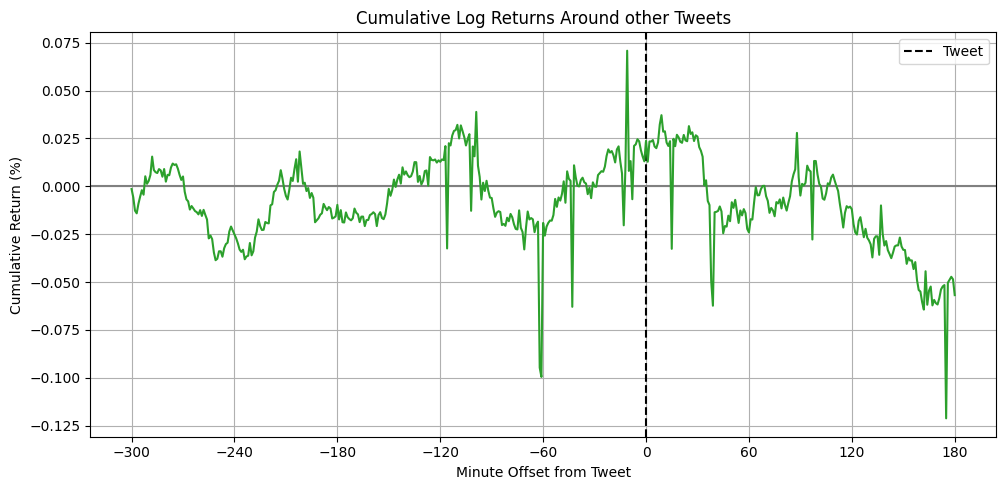

In [248]:
import matplotlib.pyplot as plt
import streamlit as st

# 1. Aggregate by minute offset: take mean log return across all events
mean_returns_non_tesla = df_events_non_tesla.groupby("min_offset")["log_return"].mean()

# 2. Compute cumulative log return 
cumulative_return_non_tesla = mean_returns_non_tesla.cumsum()

# 3. Plot
plt.figure(figsize=(10, 5))
plt.axvline(0, linestyle="--", color="black", label="Tweet")
plt.axhline(0, linestyle="-", color="gray")
plt.title("Cumulative Log Returns Around other Tweets")
plt.xlabel("Minute Offset from Tweet")
plt.xticks([-300, -240, -180, -120, -60, 0, 60, 120, 180])
plt.ylabel("Cumulative Return (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
fig = plt.plot(cumulative_return_non_tesla.index, cumulative_return_non_tesla.values * 100, label="Cumulative Log Return (%)", color="tab:green")
plt.show()

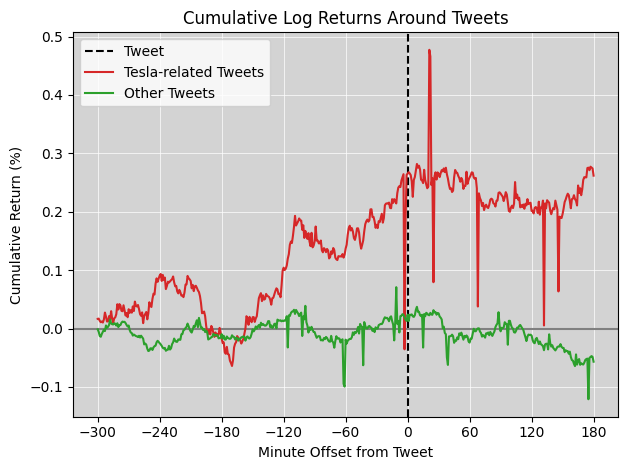

In [249]:
import matplotlib.pyplot as plt
import streamlit as st

# 1. Aggregate by minute offset: take mean log return across all events
mean_returns = df_events.groupby("min_offset")["log_return"].mean()

# 2. Compute cumulative log return 
cumulative_return = mean_returns.cumsum()

# 3. Plot
#plt.figure(figsize=(10, 5))
plt.axvline(0, linestyle="--", color="black", label="Tweet")
plt.axhline(0, linestyle="-", color="gray")
plt.title("Cumulative Log Returns Around Tweets")
plt.xlabel("Minute Offset from Tweet")
plt.xticks([-300, -240, -180, -120, -60, 0, 60, 120, 180])
plt.ylabel("Cumulative Return (%)")
plt.grid(True)
plt.tight_layout()
plt.plot(cumulative_return.index, cumulative_return.values * 100, label="Tesla-related Tweets", color="tab:red")
plt.plot(cumulative_return_non_tesla.index, cumulative_return_non_tesla.values * 100, label="Other Tweets", color="tab:green")
plt.legend()
ax = plt.gca()  
ax.set_facecolor("lightGray")
plt.grid(visible = True, **{"color": 'w', "linestyle": '-', "linewidth": 0.5})
plt.show()

In [250]:
df_events_non_tesla

,event_time,min_offset,log_return,expected_return,abnormal_return,tweet
0,2023-05-01 12:36:00-04:00,-300,0.000000,0.000000,0.000000,Worth reading The Machine Stops by EM Forster ...
1,2023-05-01 12:36:00-04:00,-299,0.000000,0.000000,0.000000,Worth reading The Machine Stops by EM Forster ...
2,2023-05-01 12:36:00-04:00,-298,0.000183,0.000000,0.000000,Worth reading The Machine Stops by EM Forster ...
3,2023-05-01 12:36:00-04:00,-297,0.000853,0.000000,0.000000,Worth reading The Machine Stops by EM Forster ...
4,2023-05-01 12:36:00-04:00,-296,-0.000244,0.000000,0.000000,Worth reading The Machine Stops by EM Forster ...
...,...,...,...,...,...,...
337176,2025-04-30 17:34:00-04:00,176,0.000000,0.000082,-0.000082,https://t.co/1c1WjFpOva
337177,2025-04-30 17:34:00-04:00,177,0.000000,0.000082,-0.000082,https://t.co/1c1WjFpOva
337178,2025-04-30 17:34:00-04:00,178,0.000000,0.000082,-0.000082,https://t.co/1c1WjFpOva
337179,2025-04-30 17:34:00-04:00,179,0.000000,0.000082,-0.000082,https://t.co/1c1WjFpOva


In [253]:
def compute_event_CAR(df):
    end_min = 120
    df = df[df['min_offset'].between(0, end_min)].sort_values(['event_time', 'min_offset'])
    df['cum_return'] = df.groupby('event_time')['abnormal_return'].cumsum()
    return df[df['min_offset'] == end_min][['event_time', 'cum_return']]

tesla_CAR = compute_event_CAR(df_events)
non_tesla_CAR = compute_event_CAR(df_events_non_tesla)  

x = abs(tesla_CAR['cum_return'])
y = abs(non_tesla_CAR['cum_return'])
from scipy.stats import ttest_ind
print(x.mean(), y.mean())

t_stat, p_val = ttest_ind(x, y, equal_var=False, alternative="greater")
print(f"Welch's t-test — T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")


0.009341461741980653 0.008924158913657962
Welch's t-test — T-statistic: 0.4828, p-value: 0.3148


In [258]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Function to compute CAR for a given window
def compute_event_CAR(df, end_min):
    df_window = df[df['min_offset'].between(0, end_min)].copy()
    df_window = df_window.sort_values(['event_time', 'min_offset'])
    df_window['cum_return'] = df_window.groupby('event_time')['abnormal_return'].cumsum()
    return df_window[df_window['min_offset'] == end_min][['event_time', 'cum_return']]

# Define event windows
windows = [2, 5, 10, 30, 60, 120, 180]

# Store results
results = []
for end_min in windows:
    tesla_CAR = compute_event_CAR(df_events, end_min)
    non_tesla_CAR = compute_event_CAR(df_events_non_tesla, end_min)

    # Use absolute CAR for testing impact magnitude
    x = abs(tesla_CAR['cum_return'])
    y = abs(non_tesla_CAR['cum_return'])

    # Welch's t-test (unequal variance) for one-sided comparison
    t_stat, p_val = ttest_ind(x, y, equal_var=False, alternative="greater")

    results.append({
        'Window [0, t] (min)': end_min,
        'Mean CAR (Tesla)': x.mean(),
        'Mean CAR (Non-Tesla)': y.mean(),
        't-statistic': t_stat,
        'p-value (Tesla > Non-Tesla)': p_val
    })

# Convert to DataFrame
result_df = pd.DataFrame(results)
print(result_df)


   Window [0, t] (min)  Mean CAR (Tesla)  Mean CAR (Non-Tesla)  t-statistic  \
0                    2          0.001058              0.001262    -1.517582   
1                    5          0.001928              0.001655     0.691709   
2                   10          0.002138              0.002202    -0.266429   
3                   30          0.004442              0.004226     0.473725   
4                   60          0.006499              0.006214     0.456256   
5                  120          0.009341              0.008924     0.482813   
6                  180          0.012990              0.011846     0.981366   

   p-value (Tesla > Non-Tesla)  
0                     0.935184  
1                     0.244912  
2                     0.604974  
3                     0.318011  
4                     0.324243  
5                     0.314778  
6                     0.163606  


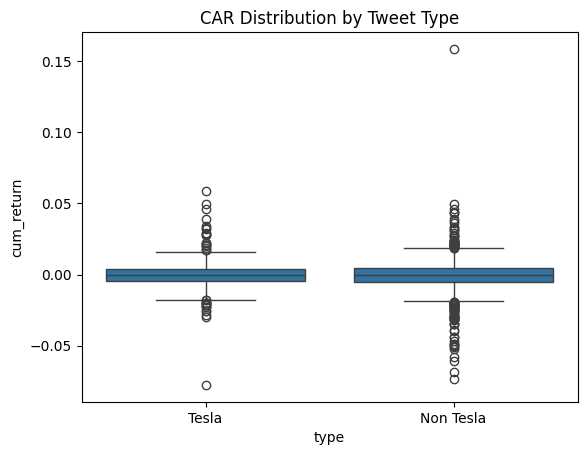

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt

combined_df = pd.concat([
    tesla_CAR.assign(type='Tesla'),
    non_tesla_CAR.assign(type='Non Tesla')
])
sns.boxplot(data=combined_df, x='type', y='cum_return')
plt.title("CAR Distribution by Tweet Type")
plt.show()


In [171]:
cumulative_return_us= pd.DataFrame(
    cumulative_return.values * 100,
    index=cumulative_return.index,
    columns=["CR"]
)
cumulative_return_us.to_csv('../data/stocks/cumulative_return_tesla_us.csv')

H0:  The cumulative abnormal returns (CARs) of minute t is equal to zero.
H1:  The cumulative abnormal returns (CARs) of minute t is different than zero.

In [172]:
from scipy.stats import ttest_1samp

# Define the windows
windows = [(0, 1), (0, 2), (0, 5), (0, 10), (0, 30), (0, 60), (0, 120), (0, 180)]

# Prepare results
results = []

for start_min, end_min in windows:
    # Filter relevant window
    df_window = df_events[(df_events["min_offset"] >= start_min) & (df_events["min_offset"] <= end_min)]

    # Compute CARs per event
    car_per_event = df_window.groupby("event_time")["abnormal_return"].sum()

    # Perform one-sample t-test against 0
    t_stat, p_val = ttest_1samp(car_per_event, 0)

    # Store results
    results.append({
        "Window": f"[{start_min},{end_min}]",
        "N Events": len(car_per_event),
        "Mean CAR": car_per_event.mean(),
        "T-Stat": t_stat,
        "P-Value": p_val
    })

# Convert to DataFrame
df_car_results = pd.DataFrame(results)
df_car_results = df_car_results[["Window", "Mean CAR", "T-Stat", "P-Value"]]
df_car_results.to_csv('../data/stocks/car_window_us.csv', index=False)

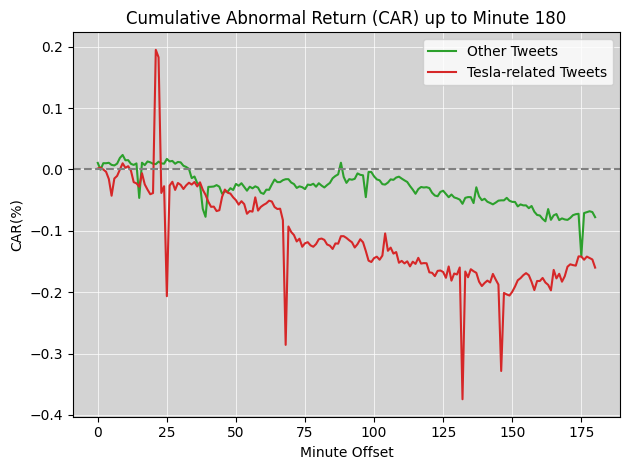

In [209]:
car_per_min = df_events[(df_events["min_offset"] >= 0) & (df_events["min_offset"] <= 180)]
car_per_min_2 = df_events_non_tesla[(df_events_non_tesla["min_offset"] >= 0) & (df_events_non_tesla["min_offset"] <= 180)]

mean_abnormal_by_minute = car_per_min.groupby('min_offset')['abnormal_return'].mean()
mean_abnormal_by_minute_2 = car_per_min_2.groupby('min_offset')['abnormal_return'].mean()

# Compute Cumulative Abnormal Return (CAR)
car = mean_abnormal_by_minute.cumsum()
car_2 = mean_abnormal_by_minute_2.cumsum()

# Plotplt.figure(figsize=(6, 4))
plt.plot(car_2.index, car_2.values*100, label='Other Tweets', color='tab:green')
plt.plot(car.index, car.values*100, label='Tesla-related Tweets', color='tab:red')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Cumulative Abnormal Return (CAR) up to Minute 180')
plt.xlabel('Minute Offset')
plt.ylabel('CAR(%)')
plt.grid(True)
plt.tight_layout()
plt.legend()
ax = plt.gca()  
ax.set_facecolor("lightGray")
plt.grid(visible = True, **{"color": 'w', "linestyle": '-', "linewidth": 0.5})
plt.show()

In [174]:
CCAR_US = pd.DataFrame(
    {
        'min_offset': car.index,
        'CCAR': car.values * 100
    }
)
CCAR_US.to_csv('../data/stocks/CCAR_tesla_us.csv', index=True)

In [175]:
from scipy.stats import ttest_rel
no_of_events = []
print(len(df_events['event_time'].unique()))
for event in df_events['event_time'].unique():
    #print(event)
    df_window = df_events[(df_events['event_time'] == event) &  (df_events['min_offset'] >= 0)]

    if len(df_window) > 0:
        # Compute CARs per event
        car_per_event_us = df_window["abnormal_return"]

        # Perform one-sample t-test against 0
        t_stat, p_val_left_sided = ttest_1samp( car_per_event_us, 0)

        if p_val_left_sided < 0.05:
            no_of_events.append(event)
            print(f"Event: {event}, T-Stat: {t_stat}, P-Value (Left-Sided): {p_val_left_sided}")
print(f"{no_of_events} Number of events with significant difference: {len(no_of_events)}")

196
Event: 2024-02-01 18:49:00-05:00, T-Stat: -2.488792818985081, P-Value (Left-Sided): 0.013725944972085532
Event: 2024-02-05 00:00:00-05:00, T-Stat: 3.169974580098166e+16, P-Value (Left-Sided): 0.0
Event: 2024-02-12 00:00:00-05:00, T-Stat: -8.731847647329206e+16, P-Value (Left-Sided): 0.0
Event: 2024-02-19 00:00:00-05:00, T-Stat: -6.351439306448633e+16, P-Value (Left-Sided): 0.0
Event: 2024-02-20 17:12:00-05:00, T-Stat: -4.245451727422065, P-Value (Left-Sided): 3.4901917690592764e-05
Event: 2024-02-26 00:00:00-05:00, T-Stat: 9.387969762845944e+16, P-Value (Left-Sided): 0.0
Event: 2024-02-27 13:40:00-05:00, T-Stat: 2.0270805900785294, P-Value (Left-Sided): 0.044129296895703815
Event: 2024-03-04 00:00:00-05:00, T-Stat: inf, P-Value (Left-Sided): 0.0
Event: 2024-03-04 12:15:00-05:00, T-Stat: 3.190919116402204, P-Value (Left-Sided): 0.0016735237431793908
Event: 2024-03-06 10:29:00-05:00, T-Stat: 3.136851587767592, P-Value (Left-Sided): 0.0019953086436535856
Event: 2024-03-07 04:31:00-05:

/Users/phuongkhanh/Documents/Master /coin seminar/COIN_Repo/.venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Event: 2024-06-17 00:00:00-04:00, T-Stat: -4.460643681231525e+16, P-Value (Left-Sided): 0.0
Event: 2024-06-17 14:11:00-04:00, T-Stat: -4.270846865141391, P-Value (Left-Sided): 3.1481680316941595e-05
Event: 2024-07-02 11:03:00-04:00, T-Stat: -3.9898300760236185, P-Value (Left-Sided): 9.610339410435612e-05
Event: 2024-07-12 12:28:00-04:00, T-Stat: -2.4868390725496994, P-Value (Left-Sided): 0.013798971425087535
Event: 2024-07-16 15:14:00-04:00, T-Stat: -2.7177004260047584, P-Value (Left-Sided): 0.007216103654694171
Event: 2024-07-19 13:42:00-04:00, T-Stat: 2.7484604914130775, P-Value (Left-Sided): 0.006597630768226165
Event: 2024-07-22 00:00:00-04:00, T-Stat: -1.1023597050035845e+17, P-Value (Left-Sided): 0.0
Event: 2024-08-05 00:00:00-04:00, T-Stat: -3.1666027519009004e+16, P-Value (Left-Sided): 0.0
Event: 2024-08-06 11:49:00-04:00, T-Stat: 2.9115354608555863, P-Value (Left-Sided): 0.004051492544793228
Event: 2024-08-26 00:00:00-04:00, T-Stat: -1.147983349562311e+17, P-Value (Left-Sided)